# **Single Character One-Hot Encoding**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read text sequence dataset
train_seq_df = pd.read_csv('https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_text_seq.csv')
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

test_seq_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_text_seq.csv")['input_str'].tolist()

# read text sequence dataset
valid_seq_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_text_seq.csv")
valid_seq_X = valid_seq_df['input_str'].tolist()
valid_seq_Y = valid_seq_df['label'].tolist()

print(f"Train dataset size: ")
print(f"train_seq_X: {len(train_seq_X)} train_seq_Y: {len(train_seq_Y)}")

print()
print("Valid dataset size: ")
print(f"valid_seq_X: {len(valid_seq_X)} valid_seq_Y: {len(valid_seq_Y)}")

print()
print("Test dataset size: ")
print(f"test_seq_X: {len(test_seq_X)}")


Train dataset size: 
train_seq_X: 7080 train_seq_Y: 7080

Valid dataset size: 
valid_seq_X: 489 valid_seq_Y: 489

Test dataset size: 
test_seq_X: 2232


In [2]:
# Convert list to NumPy array
train_seq_X = np.array(train_seq_X)
valid_seq_X = np.array(valid_seq_X)
test_seq_X = np.array(test_seq_X)
# Convert labels to numpy arrays
train_seq_Y = np.array(train_seq_Y)
valid_seq_Y = np.array(valid_seq_Y)

print(type(train_seq_X))
print(type(train_seq_X[0]))
# Convert list of strings (2D array) to a single string by flattening the array and joining all elements
all_characters = ''.join(train_seq_X.flatten())

# Get the unique characters
unique_characters = np.unique(list(all_characters))

print(f"Unique characters: {unique_characters}")
print(f"Number of unique characters: {len(unique_characters)}")
print(np.unique(valid_seq_Y))

<class 'numpy.ndarray'>
<class 'numpy.str_'>
Unique characters: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Number of unique characters: 10
[0 1]


In [3]:
# Get unique characters for one digit (0-9)
unique_characters = [str(i) for i in range(10)]  # ['0', '1', ..., '9']
num_classes = len(unique_characters)  # 10 classes

# Create a mapping from characters to indices
char_to_index = {char: idx for idx, char in enumerate(unique_characters)}

# Function to convert input seqs to a max_len x 10 matrix using single characters
def one_hot_count_matrix(seq, max_len=50):
    # Initialize a matrix of zeros
    matrix = np.zeros((max_len, num_classes))  # max_len x 10 matrix for single characters
    # Extract each character and update the matrix
    for i in range(0, min(len(seq), max_len)):  # Loop through each character in the sequence
        char = seq[i]  # Get a single character
        if char in char_to_index:
            index = char_to_index[char]
            matrix[i, index] = 1  # One-hot encoding
    return matrix  # Flatten to a vector for SVM input

# Create the training, validation, and test datasets
X_train_one_hots = np.array([one_hot_count_matrix(seq) for seq in train_seq_X])
X_valid_one_hots = np.array([one_hot_count_matrix(seq) for seq in valid_seq_X])
X_test_one_hots = np.array([one_hot_count_matrix(seq) for seq in test_seq_X])

print(X_train_one_hots.shape)
print(X_valid_one_hots.shape)
print(X_test_one_hots.shape)
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train_one_hots.reshape(len(X_train_one_hots), -1))
X_valid = scaler.transform(X_valid_one_hots.reshape(len(X_valid_one_hots), -1))
X_test = scaler.transform(X_test_one_hots.reshape(len(X_test_one_hots), -1))

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)


(7080, 50, 10)
(489, 50, 10)
(2232, 50, 10)
(7080, 500)
(489, 500)
(2232, 500)


# ***Logistic Regression***

In [5]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with Logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")

Train Accuracy with Logistic Regression: 0.7251412429378531
Validation Accuracy with Logistic Regression: 0.6482617586912065
F1 Score with Logistic Regression: 0.6481497964431774
Number of trainable parameters: 501


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.828390             0.582822
1          40           0.758828             0.625767
2          60           0.745527             0.635992
3          80           0.724576             0.642127
4         100           0.725141             0.648262


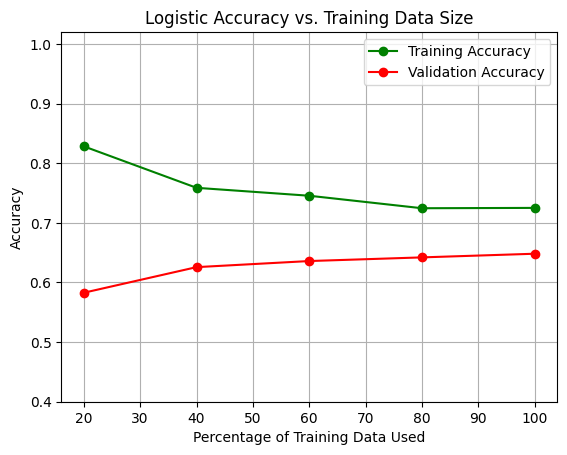

In [6]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Logistic classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_seq_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_seq_Y, train_size=percentage, random_state=42)

    # Train Logistic Regression classifier
    logreg_classifier = LogisticRegression(max_iter=1000)
    logreg_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = logreg_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = logreg_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)
# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# ***KNN***

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy:}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with KNN Regression: {f1}")

Train Accuracy with KNN: 0.7515536723163841
Validation Accuracy with KNN: 0.6196319018404908
F1 Score with KNN Regression: 0.6196319018404908


# ***LwP***

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, train_seq_Y)

# Predict on the training data
train_predictions = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with LWP: {train_accuracy}")

# Predict on the validation data
valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with LWP: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with LWP Regression: {f1}")

Train Accuracy with LWP: 0.651412429378531
Validation Accuracy with LWP: 0.6155419222903885
F1 Score with LWP Regression: 0.6154195449495193


# ***SVM Classifier***

In [9]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid)
train_predictions = svm_classifier.predict(X_train)

# Calculate validation accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")

Train Accuracy with SVM: 0.7252824858757062
Validation Accuracy with SVM: 0.656441717791411
F1 Score with SVM: 0.655726211795545
Number of trainable parameters: 501


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.860169             0.591002
1          40           0.775071             0.646217
2          60           0.749058             0.625767
3          80           0.730049             0.660532
4         100           0.725282             0.656442


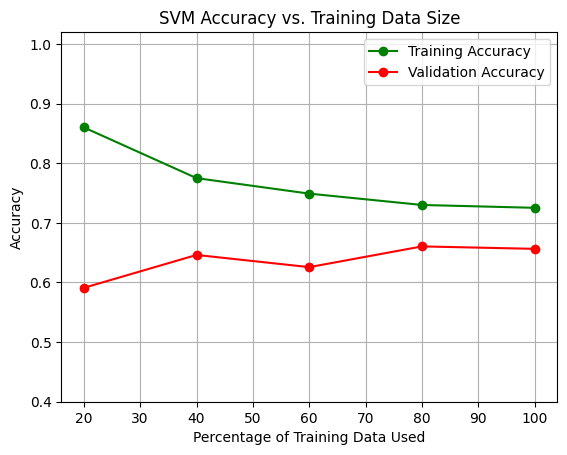

In [10]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Train SVM classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_seq_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_seq_Y, train_size=percentage, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')  # You can experiment with other kernels if needed
    svm_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = svm_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = svm_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# ***Deep Neural Network***

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

X_train = X_train_one_hots
X_valid = X_valid_one_hots
X_test = X_test_one_hots

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

# Reshape the data to 2D for scaling (samples, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_valid_reshaped = X_valid.reshape(X_valid.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the train, valid, and test sets
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_valid_scaled = scaler.transform(X_valid_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape the scaled data back to the original 3D shape
X_train = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_valid = X_valid_scaled.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2])
X_test = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(7080, 50, 10)
(489, 50, 10)
(2232, 50, 10)
(7080, 50, 10)
(489, 50, 10)
(2232, 50, 10)


In [15]:
# Define a CNN model with fewer parameters
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(50, 10)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(16, activation='relu'))  # Smaller dense layer
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, train_seq_Y, epochs=30, batch_size=32, validation_data=(X_valid, valid_seq_Y), verbose = 0)

# Evaluate the model on training and validation data
train_loss, train_accuracy = model.evaluate(X_train, train_seq_Y, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid, valid_seq_Y, verbose=0)

# Predictions and calculate F1 score and confusion matrix
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
f1 = f1_score(valid_seq_Y, valid_predictions)

# Print accuracies and F1 score
model.summary()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

16/16 [==============================] - 0s 2ms/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 49, 16)            336       
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 24, 16)            0         
 ng1D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 24, 16)            0         
                                                                 
 conv1d_19 (Conv1D)          (None, 22, 16)            784       
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 11, 16)            0         
 ng1D)                                                           
                                                                 
 

Training on 20.0% of the data
Training on 40.0% of the data
Training on 60.0% of the data
Training on 80.0% of the data
Training on 100.0% of the data
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.774011             0.658487
1          40           0.792020             0.723926
2          60           0.784369             0.754601
3          80           0.795198             0.746421
4         100           0.814548             0.789366


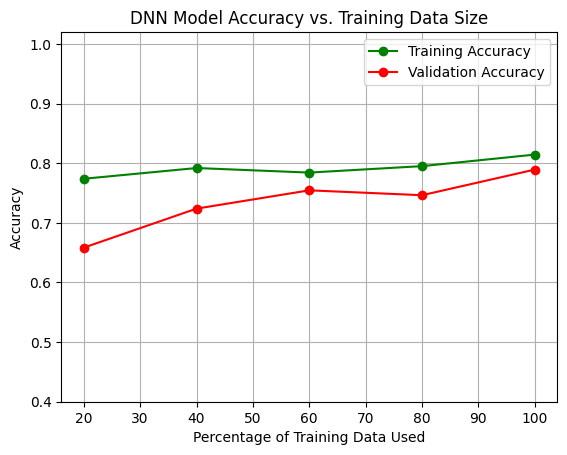

In [16]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
train_accuracies = []
valid_accuracies = []

# Analyze model performance with different training set sizes
for percentage in train_percentages:
    print(f"Training on {percentage * 100}% of the data")
    if percentage == 1.0:
        X_train_subset = X_train
        Y_train_subset = train_seq_Y
    else:
        X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_seq_Y, train_size=percentage, random_state=42)

    # Define a CNN model with fewer parameters
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(50, 10)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(16, activation='relu'))  # Smaller dense layer
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_subset, Y_train_subset, epochs=30, batch_size=32, validation_data=(X_valid, valid_seq_Y), verbose=0)

    # Evaluate the model on training and validation data
    train_loss, train_accuracy = model.evaluate(X_train_subset, Y_train_subset, verbose=0)
    valid_loss, valid_accuracy = model.evaluate(X_valid, valid_seq_Y, verbose=0)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('DNN Model Accuracy vs. Training Data Size')
plt.legend()
plt.grid(True)
plt.show()


# **Overlapping Two-Character One-Hot Encoding**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read text sequence dataset
train_seq_df = pd.read_csv('https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_text_seq.csv')
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

test_seq_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_text_seq.csv")['input_str'].tolist()

# read text sequence dataset
valid_seq_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_text_seq.csv")
valid_seq_X = valid_seq_df['input_str'].tolist()
valid_seq_Y = valid_seq_df['label'].tolist()

print(f"Train dataset size: ")
print(f"train_seq_X: {len(train_seq_X)} train_seq_Y: {len(train_seq_Y)}")

print()
print("Valid dataset size: ")
print(f"valid_seq_X: {len(valid_seq_X)} valid_seq_Y: {len(valid_seq_Y)}")

print()
print("Test dataset size: ")
print(f"test_seq_X: {len(test_seq_X)}")


Train dataset size: 
train_seq_X: 7080 train_seq_Y: 7080

Valid dataset size: 
valid_seq_X: 489 valid_seq_Y: 489

Test dataset size: 
test_seq_X: 2232


In [30]:
# Convert list to NumPy array
train_seq_X = np.array(train_seq_X)
valid_seq_X = np.array(valid_seq_X)
test_seq_X = np.array(test_seq_X)
# Convert labels to numpy arrays
train_seq_Y = np.array(train_seq_Y)
valid_seq_Y = np.array(valid_seq_Y)

print(type(train_seq_X))
print(type(train_seq_X[0]))
# Convert list of strings (2D array) to a single string by flattening the array and joining all elements
all_characters = ''.join(train_seq_X.flatten())

# Get the unique characters
unique_characters = np.unique(list(all_characters))

print(f"Unique characters: {unique_characters}")
print(f"Number of unique characters: {len(unique_characters)}")
print(np.unique(valid_seq_Y))

<class 'numpy.ndarray'>
<class 'numpy.str_'>
Unique characters: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Number of unique characters: 10
[0 1]


In [31]:
# Get unique characters for two digits
unique_characters = [f"{i:02d}" for i in range(100)]  # ['00', '01', ..., '99']
num_classes = len(unique_characters)  # 100 classes

# Create a mapping from characters to indices
char_to_index = {char: idx for idx, char in enumerate(unique_characters)}

# Function to convert input seqs to a 49x100 matrix using overlapping pairs
def one_hot_count_matrix(seq, max_len=50):
    # Initialize a matrix of zeros
    matrix = np.zeros((max_len - 1, num_classes))  # 49x100 matrix for overlapping pairs
    # Extract overlapping pairs and update the matrix
    for i in range(0, max_len - 1):  # Loop from seq[0:2] to seq[48:50]
        char_pair = seq[i:i + 2]  # Get overlapping pairs of characters
        if char_pair in char_to_index:
            index = char_to_index[char_pair]
            matrix[i, index] = 1  # One-hot encoding
    return matrix.flatten()  # Flatten to a vector for SVM input

# Create the training and validation datasets
X_train = np.array([one_hot_count_matrix(seq) for seq in train_seq_X])
X_valid = np.array([one_hot_count_matrix(seq) for seq in valid_seq_X])
X_test = np.array([one_hot_count_matrix(seq) for seq in test_seq_X])

print(X_train.shape)  # Expected shape: (N_train, 4900)
print(X_valid.shape)  # Expected shape: (N_valid, 4900)
print(X_test.shape) #Expected shape: (N_test, 4900)



(7080, 4900)
(489, 4900)
(2232, 4900)


# ***Logistic Regression***

In [32]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with Logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")

Train Accuracy with Logistic Regression: 0.9474576271186441
Validation Accuracy with Logistic Regression: 0.7402862985685071
F1 Score with Logistic Regression: 0.7401775047458308
Number of trainable parameters: 4901


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.999294             0.621677
1          40           0.993997             0.670757
2          60           0.974341             0.685072
3          80           0.960275             0.728016
4         100           0.947458             0.740286


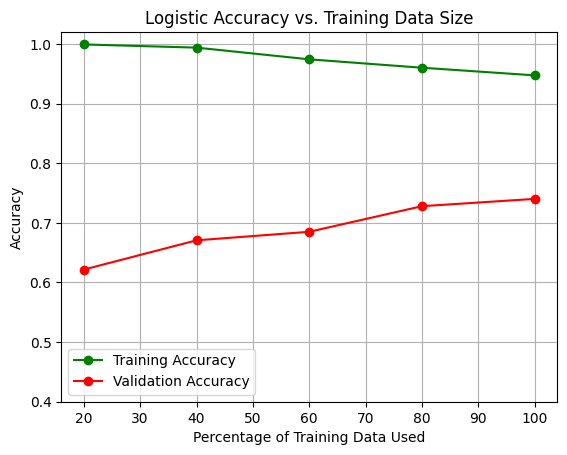

In [33]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Logistic classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_seq_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_seq_Y, train_size=percentage, random_state=42)

    # Train Logistic Regression classifier
    logreg_classifier = LogisticRegression(max_iter=1000)
    logreg_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = logreg_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = logreg_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)
# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# ***KNN***

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy:}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with KNN Regression: {f1}")

Train Accuracy with KNN: 0.7067796610169491
Validation Accuracy with KNN: 0.588957055214724
F1 Score with KNN Regression: 0.5887848697158423


# ***LwP***

In [35]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, train_seq_Y)

# Predict on the training data
train_predictions = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with LWP: {train_accuracy}")

# Predict on the validation data
valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with LWP: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with LWP Regression: {f1}")

Train Accuracy with LWP: 0.6
Validation Accuracy with LWP: 0.5664621676891616
F1 Score with LWP Regression: 0.5660077178951286


# ***SVM Classifier***

In [36]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid)
train_predictions = svm_classifier.predict(X_train)

# Calculate validation accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")

Train Accuracy with SVM: 0.9610169491525423
Validation Accuracy with SVM: 0.7423312883435583
F1 Score with SVM: 0.7420611908244631
Number of trainable parameters: 4901


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           1.000000             0.607362
1          40           0.999647             0.646217
2          60           0.988701             0.695297
3          80           0.974223             0.723926
4         100           0.961017             0.742331


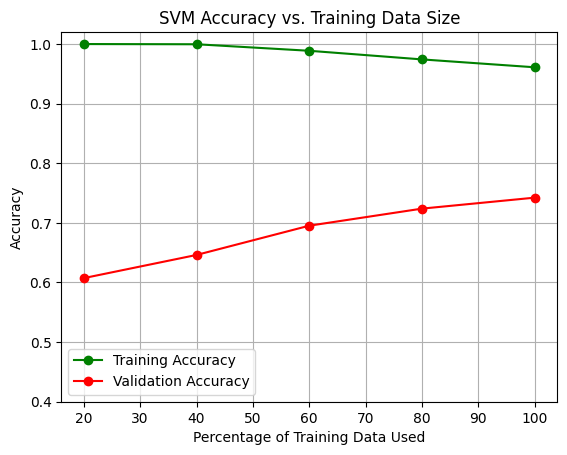

In [37]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Train SVM classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_seq_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_seq_Y, train_size=percentage, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')  # You can experiment with other kernels if needed
    svm_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = svm_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = svm_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# ***Deep Neural Network***

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape input to fit CNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 49, 100))
X_valid = X_valid.reshape((X_valid.shape[0], 49, 100))
X_test = X_test.reshape((X_test.shape[0], 49, 100))

print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (7080, 49, 100)
X_valid shape: (489, 49, 100)
X_test shape: (2232, 49, 100)


In [39]:
# Define a CNN model with fewer parameters
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(49, 100)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(16, activation='relu'))  # Smaller dense layer
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, train_seq_Y, epochs=30, batch_size=32, validation_data=(X_valid, valid_seq_Y))

# Evaluate the model on training and validation data
train_loss, train_accuracy = model.evaluate(X_train, train_seq_Y, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid, valid_seq_Y, verbose=0)

# Predictions and calculate F1 score and confusion matrix
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
f1 = f1_score(valid_seq_Y, valid_predictions)

# Print accuracies and F1 score
model.summary()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/30
222/222 [==============================] - 2s 5ms/step - loss: 0.6197 - accuracy: 0.6353 - val_loss: 0.4585 - val_accuracy: 0.7853
Epoch 2/30
222/222 [==============================] - 1s 4ms/step - loss: 0.4382 - accuracy: 0.8040 - val_loss: 0.3612 - val_accuracy: 0.8364
Epoch 3/30
222/222 [==============================] - 1s 4ms/step - loss: 0.3624 - accuracy: 0.8407 - val_loss: 0.3031 - val_accuracy: 0.8773
Epoch 4/30
222/222 [==============================] - 1s 4ms/step - loss: 0.3305 - accuracy: 0.8552 - val_loss: 0.2777 - val_accuracy: 0.8712
Epoch 5/30
222/222 [==============================] - 1s 4ms/step - loss: 0.3101 - accuracy: 0.8674 - val_loss: 0.2898 - val_accuracy: 0.8773
Epoch 6/30
222/222 [==============================] - 1s 4ms/step - loss: 0.2947 - accuracy: 0.8767 - val_loss: 0.2724 - val_accuracy: 0.8732
Epoch 7/30
222/222 [==============================] - 1s 4ms/step - loss: 0.2841 - accuracy: 0.8770 - val_loss: 0.2384 - val_accuracy: 0.8978
Epoch 

Training on 20.0% of the data
Training on 40.0% of the data
Training on 60.0% of the data
Training on 80.0% of the data
Training on 100.0% of the data
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.978107             0.793456
1          40           0.965749             0.867076
2          60           0.956450             0.883436
3          80           0.952507             0.895706
4         100           0.945339             0.920245


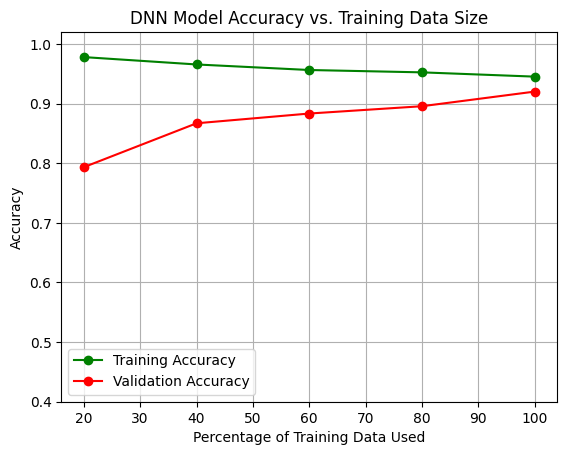

In [40]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
train_accuracies = []
valid_accuracies = []

# Analyze model performance with different training set sizes
for percentage in train_percentages:
    print(f"Training on {percentage * 100}% of the data")
    if percentage == 1.0:
        X_train_subset = X_train
        Y_train_subset = train_seq_Y
    else:
        X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_seq_Y, train_size=percentage, random_state=42)

    # Define a CNN model with fewer parameters
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(49, 100)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(16, activation='relu'))  # Smaller dense layer
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_subset, Y_train_subset, epochs=30, batch_size=32, validation_data=(X_valid, valid_seq_Y), verbose=0)

    # Evaluate the model on training and validation data
    train_loss, train_accuracy = model.evaluate(X_train_subset, Y_train_subset, verbose=0)
    valid_loss, valid_accuracy = model.evaluate(X_valid, valid_seq_Y, verbose=0)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('DNN Model Accuracy vs. Training Data Size')
plt.legend()
plt.grid(True)
plt.show()


# **Embeddings-Based Feature Extraction**

In [41]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
np.random.seed(123)


# read text sequence dataset
train_seq_df = pd.read_csv('https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_text_seq.csv')
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

test_seq_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_text_seq.csv")['input_str'].tolist()

# read text sequence dataset
valid_seq_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_text_seq.csv")
valid_seq_X = valid_seq_df['input_str'].tolist()
valid_seq_Y = valid_seq_df['label'].tolist()


# Convert lists to NumPy arrays
train_seq_X = np.array(train_seq_X)
valid_seq_X = np.array(valid_seq_X)
test_seq_X = np.array(test_seq_X)

# Ensure labels are NumPy arrays
train_seq_Y = np.array(train_seq_Y)
valid_seq_Y = np.array(valid_seq_Y)

# Concatenate all texts to get unique characters
all_texts = ''.join(train_seq_X.flatten()) + ''.join(valid_seq_X.flatten()) + ''.join(test_seq_X.flatten())
unique_characters = np.unique(list(all_texts))

# Create character-to-index mapping
char_to_index = {char: idx + 1 for idx, char in enumerate(unique_characters)}  # Index starts from 1 for embedding
num_classes = len(unique_characters) + 1  # Include 0 for padding

# Convert sequences to integer sequences
def convert_to_sequences(sequences):
    return [[char_to_index[char] for char in seq] for seq in sequences]

# Convert to integer sequences
X_train = convert_to_sequences(train_seq_X)
X_valid = convert_to_sequences(valid_seq_X)
X_test = convert_to_sequences(test_seq_X)

# Pad sequences to a fixed length
max_len = 50 # Fixed sequence length
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_valid = pad_sequences(X_valid, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

# ***Logistic Regression***

In [42]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with Logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")

Validation Accuracy with Logistic Regression: 0.5419222903885481
Train Accuracy with Logistic Regression: 0.5669491525423729
F1 Score with Logistic Regression: 0.5398657251996759
Number of trainable parameters: 51


# ***KNN***

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy:}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with KNN Regression: {f1}")

Validation Accuracy with KNN: 0.5132924335378323
Train Accuracy with KNN: 0.6919491525423729
F1 Score with KNN Regression: 0.5131375090318383


# ***LwP***

In [44]:
from sklearn.metrics import accuracy_score

def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, train_seq_Y)

# Predict on the training data
train_predictions = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with LWP: {train_accuracy}")

# Predict on the validation data
valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with LWP: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"f1 score with LwP Regression: {f1}")

Train Accuracy with LWP: 0.5459039548022598
Validation Accuracy with LWP: 0.5480572597137015
f1 score with LwP Regression: 0.5476480302940874


# ***SVM Classifier***

In [45]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the datasets
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)  # Only transform, no fitting on validation or test sets
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train_scaled, train_seq_Y)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid_scaled)
train_predictions = svm_classifier.predict(X_train_scaled)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

# Calculate validation accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")


Validation Accuracy with SVM: 0.523517382413088
Train Accuracy with SVM: 0.5651129943502825
F1 Score with SVM: 0.5212409326418844
Number of trainable parameters: 51


# ***Deep Neural Network***

In [46]:
# Define the model for feature extraction
embedding_dimension = 8 # Dimension of the embedding
# Define and compile the model
model = Sequential()
model.add(Embedding(input_dim=num_classes, output_dim=embedding_dimension, input_length=max_len))  # Added input_length
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, train_seq_Y, epochs=10, batch_size=32, validation_data=(X_valid, valid_seq_Y),verbose = 0)

# Evaluate the model on training and validation data
train_loss, train_accuracy = model.evaluate(X_train, train_seq_Y, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid, valid_seq_Y, verbose=0)

# Predictions and calculate F1 score and confusion matrix
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
f1 = f1_score(valid_seq_Y, valid_predictions)

# Print accuracies and F1 score
model.summary()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

16/16 [==============================] - 0s 1ms/step
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 8)             88        
                                                                 
 flatten_27 (Flatten)        (None, 400)               0         
                                                                 
 dense_54 (Dense)            (None, 16)                6416      
                                                                 
 dense_55 (Dense)            (None, 1)                 17        
                                                                 
Total params: 6521 (25.47 KB)
Trainable params: 6521 (25.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training Accuracy: 0.7504
Validation Accuracy: 0.6769
F1 Score: 0.6520


Training on 20.0% of the data
Training on 40.0% of the data
Training on 60.0% of the data
Training on 80.0% of the data
Training on 100.0% of the data
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.784605             0.599182
1          40           0.804379             0.621677
2          60           0.770716             0.635992
3          80           0.763948             0.668712
4         100           0.768362             0.668712


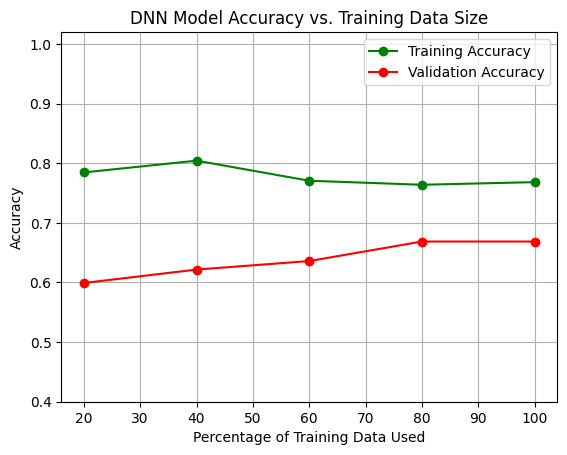

In [47]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
train_accuracies = []
valid_accuracies = []

# Analyze model performance with different training set sizes
for percentage in train_percentages:
    print(f"Training on {percentage * 100}% of the data")
    if percentage == 1.0:
        X_train_subset = X_train
        Y_train_subset = train_seq_Y
    else:
        X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_seq_Y, train_size=percentage, random_state=42)

    # Define and compile the model
    model = Sequential()
    model.add(Embedding(input_dim=num_classes, output_dim=embedding_dimension, input_length=max_len))  # Added input_length
    model.add(Flatten())
    model.add(Dense(24, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_subset, Y_train_subset, epochs=10, batch_size=32, validation_data=(X_valid, valid_seq_Y), verbose=0)

    # Evaluate the model on training and validation data
    train_loss, train_accuracy = model.evaluate(X_train_subset, Y_train_subset, verbose=0)
    valid_loss, valid_accuracy = model.evaluate(X_valid, valid_seq_Y, verbose=0)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('DNN Model Accuracy vs. Training Data Size')
plt.legend()
plt.grid(True)
plt.show()
